# Regression

Im Gegensatz zu einer Klassifikation, die *diskrete Werte* vorhersagt, hat die Regression *kontinuierliche Werte* als Ergebnis.

Bei der *linearen Regression* geht es darum eine *Gerade* zu finden, die die Zielwerte möglichst exakt aus den unabhängigen Variablen vorhersagt. Die *Regressionsgerade* wird normalerweise durch eine Gleichung dargestellt ("parametrisiert"):

$$ y = mx + t $$

$m$ ist dabei die Steigung der Geraden, $t$ der sog. *Achsenabschnitt*.
Solltest du mehrere unabhängige Variablen haben (das wirst du später genauer betrachten), kannst du mit Vektoren rechnen:

$$ y = {\mathbf m} {\mathbf x} + t $$

Wir fangen zunächst ganz einfach an. Auch für die Regression gibt es Datensets, z.B. das der Hauspreise in Kalifornien (das vielbenutzte Boston-Datenset sollte man nicht mehr verwenden!). Das wirst du nun zunächst einladen und anschließend analysieren.

## Datenset laden

Das Prozedere kennst du schon, allerdings ist das Datenset nicht ganz so eng in `sklearn` integriert, daher ist der Aufruf ein bisschen anders:

In [1]:
from sklearn import datasets
california = datasets.fetch_california_housing()

In [2]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Wie gehabt wandelst du das Datenset in einen `DataFrame`.

In [3]:
import pandas as pd
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Price"] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Korrelationen

Zunächst interessierst du dich für die Korrelationen der einzelnen Spalten:

In [4]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Das sid sog. *Pearson-R-Werte*. Werte um `0` drücken keine Korrelation aus, `1` ist perfekt korreliert, `-1` ist perfekt antikorreliert. 

Offenbar ist das mittlere Einkommen `MedInc` sehr gut mit dem `Price` korreliert. Das wirst du gleich ausnutzen. Schau dir zunächst aber nochmal die Verteilung an:

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

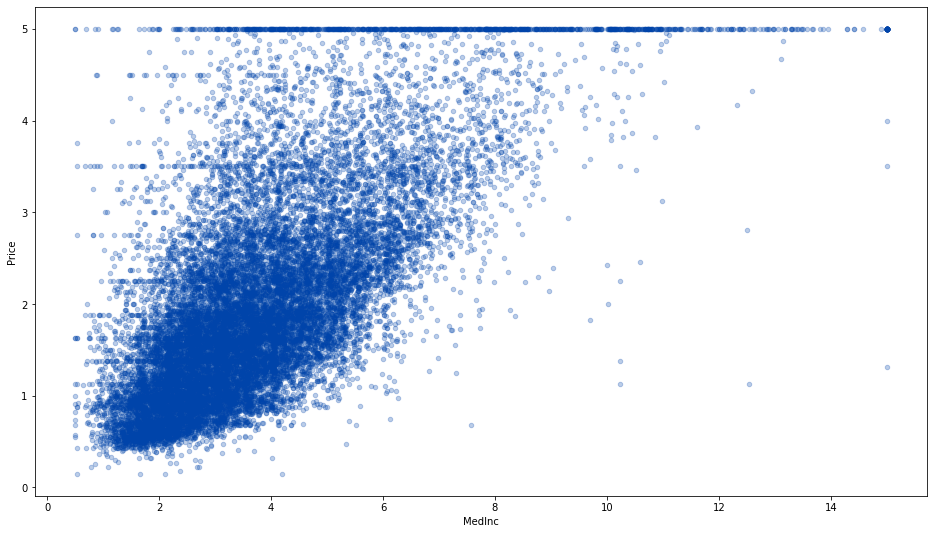

In [5]:
df.plot.scatter(x="MedInc", y="Price", c="#0044aa44", figsize=(16,9))

Die Hauspreise sind bei `5` (entspricht 500.000\$) abgeschnitten, das ist natürlich nicht so günstig! Wenn du möchtest, kannst du die mit `df5 = df[df["Price"] < 5]` filtern, in diesem Beispiel lassen wir die mit drin.

## Einfache lineare Regression

Wie schon von der Klassifikation gewohnt nennst du die unabhängige Variable `X`, die abhängige `y`:

In [6]:
X = df[["MedInc"]]
y = df["Price"]

Die lineare Regression kannst du mit  `sklearn` ganz einfach durchführen:

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

Als Ergebnis erhältst du das oben angesprochene $m$ (die Steigung), das hier als `coef_` bezeichnet wird

In [8]:
lr.coef_

array([0.41793849])

Der Kaufpreis wächst also "nur" mit 40% des Median-Einkommens.

Auch den Achsenabschnitt kannst du ermitteln:

In [9]:
lr.intercept_

0.45085576703267893

Ohne Einkommen zahlen die Menschen im Mittel also 45.000\$ für ein Haus.

Nun könntest du die Vorhersage mit der Geradengleichung berechnen, oder du nutzt dafür die `predict`-Methode:

In [10]:
df["Predicted Price"] = lr.predict(df[["MedInc"]])

Jetzt kannst du die Vorhersage mit den echten Werten zusammen einzeichnen.

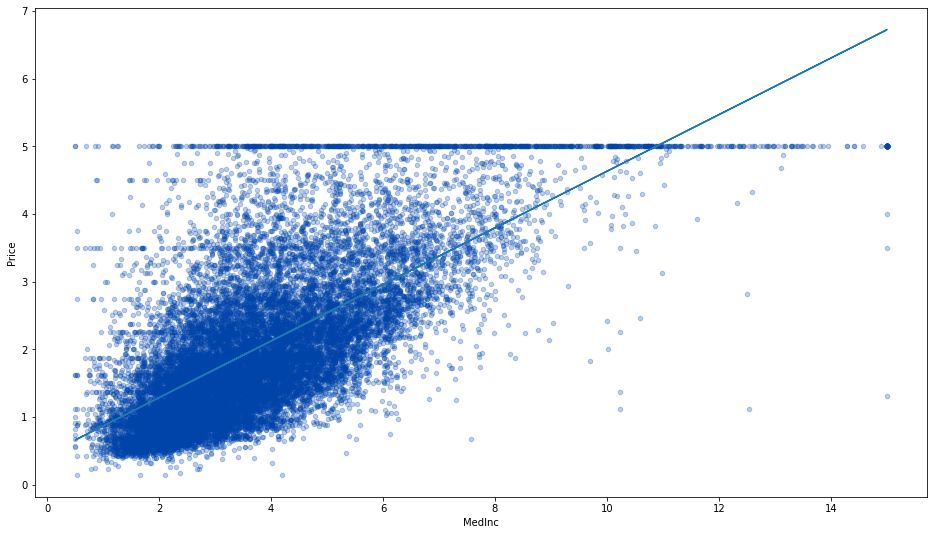

In [11]:
df.plot.scatter(x="MedInc", y="Price", c="#0044aa44", figsize=(16, 9));
df.set_index("MedInc")["Predicted Price"].plot(figsize=(16, 9));

Das sieht schon ganz gut aus, aber wie kannst du jetzt den Fehler berechnen?

## Fehler berechnen

Dazu gibt es mehrere Ansätze. Du kannst die *mittlere quadratische Abweichung* berechnen. Quadratiert wird die Abweichung, damit sich positive und negative Abweichungen nicht gegeneinander aufheben.

In [12]:
from sklearn import metrics
metrics.mean_squared_error(y, df["Predicted Price"])

0.7011311502929527

Eine andere Möglichkeit ist es, den mittleren absoluten Fehler zu berechnen (statt zu quadrieren nutzt du den Betrag):

In [13]:
metrics.mean_absolute_error(y, df["Predicted Price"])

0.6262593379114338

Wo hat die Vorhersagen den größten Fehler gemacht?

In [14]:
metrics.max_error(y, df["Predicted Price"])

5.406974941166323

Die Fehler sind abhängig von der Größe der vorhergesagten Werte. Möchtest du eine davon unabhängige Größe berechnen, kannst du den `r2`-Wert verwenden:

In [ ]:
metrics.r2_score(y, df["Predicted Price"])

Je näher der `r2`-Wert bei `1` liegt, desto besser ist der Fit.

## Zusammenfassung

Regression funktioniert nicht so viel anders als Klassifikation. Allerdings gibt es hier keine *Confusion Matrix*, *Precision* und *Recall*, sondern der Fehler muss anders berechnet werden.

Bisher sollte der Regressor nur bekannte Werte vorhersagen - er könnte als auch auswendig gelernt haben. Genau wie bei der Klassifikation kannst du auch bei der Regresion mit einem Trainings- und davon unabhängigen Test-Datenset arbeiten.